# An exploratory data analysis of bitcoin prices

## Motivation

I want to take a closer look at bitcoin's price history and the characteristics of the different cycles it's been through and see if anything interesting can be unearthed from it.

## Notebook setup

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

In [2]:
plt.style.use("seaborn")

## The data

I've downloaded a `.csv` from [Coin Metrics](https://coinmetrics.io/data-downloads/) containing data on various characteristics of the BTC network.

In [3]:
btc_data = pd.read_csv("data/btc_data.csv",
                  sep=",",
                  header=0,
                  index_col=0,
                  parse_dates=True)

btc_data.head()

,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),realizedCap(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
date,,,,,,,,,,,,,,,,
2009-01-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
btc_data.tail()

,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),realizedCap(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
date,,,,,,,,,,,,,,,,
2019-02-27,3.185790e+09,1.677494e+09,344419.0,6.774487e+10,3857.48,8.301310e+09,7.376055e+10,1762.500000,32.663184,679225.0,6.071846e+12,404256.0,74.744307,0.000042,158642210.0,141.0
2019-02-28,3.516776e+09,2.092993e+09,367677.0,6.759008e+10,3848.26,8.399768e+09,7.326443e+10,1874.999999,30.295942,692972.0,6.071846e+12,404743.0,59.420213,0.000035,169610591.0,150.0
2019-03-01,2.876654e+09,1.500186e+09,354260.0,6.769473e+10,3853.76,7.661248e+09,7.305117e+10,2025.000000,30.486120,723763.0,6.071846e+12,435776.0,63.485224,0.000038,170597568.0,162.0
2019-03-02,2.316639e+09,1.127208e+09,335732.0,6.772839e+10,3855.32,7.578786e+09,7.236354e+10,1650.000000,25.321537,631290.0,6.071846e+12,370265.0,43.882679,0.000032,152536462.0,132.0
2019-03-03,4.433945e+09,1.002193e+09,353537.0,6.785750e+10,3862.27,7.253558e+09,7.229503e+10,1825.000000,21.384300,555628.0,6.071846e+12,311337.0,15.850949,0.000026,146522736.0,146.0


In [5]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3712 entries, 2009-01-03 to 2019-03-03
Data columns (total 16 columns):
txVolume(USD)            2136 non-null float64
adjustedTxVolume(USD)    2136 non-null float64
txCount                  3706 non-null float64
marketcap(USD)           2136 non-null float64
price(USD)               2136 non-null float64
exchangeVolume(USD)      2136 non-null float64
realizedCap(USD)         3712 non-null float64
generatedCoins           3706 non-null float64
fees                     3706 non-null float64
activeAddresses          3706 non-null float64
averageDifficulty        3706 non-null float64
paymentCount             3706 non-null float64
medianTxValue(USD)       2136 non-null float64
medianFee                3452 non-null float64
blockSize                3706 non-null float64
blockCount               3706 non-null float64
dtypes: float64(16)
memory usage: 493.0 KB


As the DataFrame's `head` contains mostly `NaN`s, let's quickly use the [missigno](https://github.com/ResidentMario/missingno) library to check on the data's completeness:

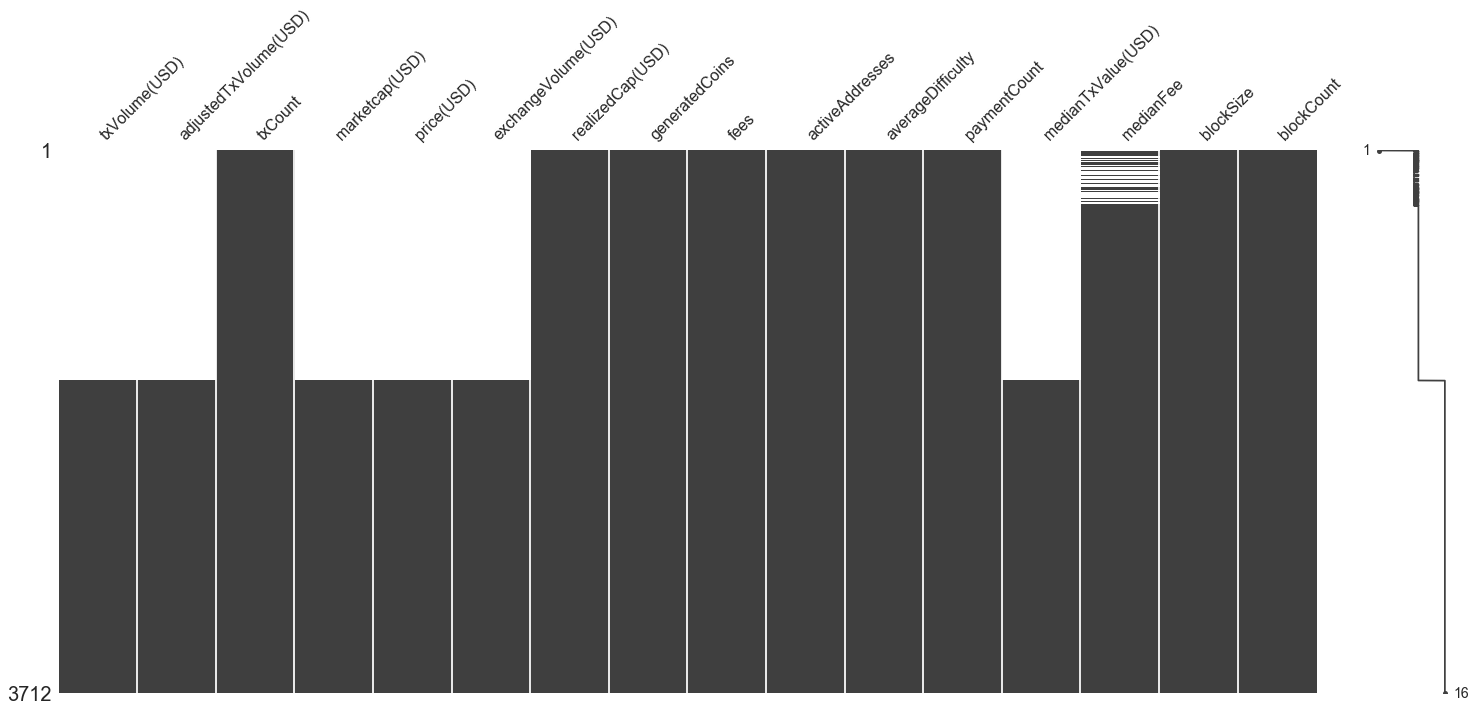

<Figure size 576x396 with 0 Axes>

In [6]:
msno.matrix(btc_data)
plt.show()
plt.clf()

While there are many data points missing in the intial entries, the data seem to be complete from there on out.

As can be seen above, this dataset is pretty comprehensive. Since we're only interested in the price data, we can filter that out:

In [7]:
btc = pd.DataFrame()
btc["price"] = btc_data["price(USD)"].copy()

print("Head\n", btc.head())
print("\n\nTail:\n", btc.tail())

Head
             price
date             
2009-01-03    NaN
2009-01-04    NaN
2009-01-05    NaN
2009-01-06    NaN
2009-01-07    NaN


Tail:
               price
date               
2019-02-27  3857.48
2019-02-28  3848.26
2019-03-01  3853.76
2019-03-02  3855.32
2019-03-03  3862.27


We can check for any duplicate days and missing values in the dataset and deal with those:

In [8]:
duplicate_days = len(btc[btc.index.duplicated()].index)

print("Number of duplicate days in the dataset: ", duplicate_days)

Number of duplicate days in the dataset:  0


In [9]:
missing_days = btc["price"].isna().sum()

print("Number of missing days in the dataset: ", missing_days)

Number of missing days in the dataset:  1576


From the *missingno* graph, I can tell that the missing data is all at the head of the price series, so we can just filter those out:

In [10]:
btc_final = btc.loc[btc.first_valid_index():].copy()

print("Head:\n", btc_final.head())
print("\n\nTail:\n", btc_final.tail())

Head:
              price
date              
2013-04-28  135.30
2013-04-29  134.44
2013-04-30  144.00
2013-05-01  139.00
2013-05-02  116.38


Tail:
               price
date               
2019-02-27  3857.48
2019-02-28  3848.26
2019-03-01  3853.76
2019-03-02  3855.32
2019-03-03  3862.27


Let's just check that the missing data was *indeed* only in the head of our dataset:

In [11]:
missing_days_btc_final = btc_final.isna().sum()["price"]

print("Number of missing days in the dataset: ", missing_days_btc_final)

Number of missing days in the dataset:  0


## An overview of the price data

Finally, we can start visually exploring what the data looks like:

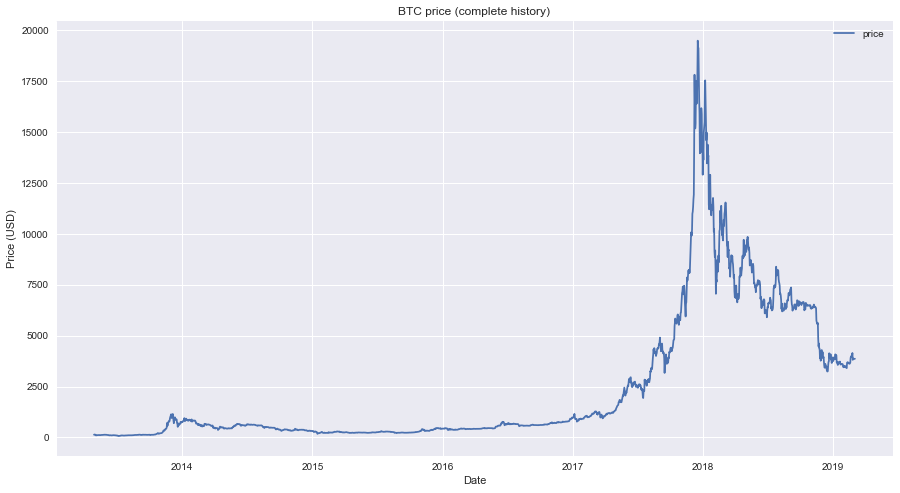

<Figure size 576x396 with 0 Axes>

In [12]:
btc_final.plot(figsize=(15, 8))

plt.title("BTC price (complete history)")
plt.ylabel("Price (USD)")
plt.xlabel("Date")

plt.show()
plt.clf()

Let's overlay some moving averages onto these prices:

In [13]:
btc_final["ma7"] = btc_final["price"].rolling(window=7).mean()
btc_final["ma30"] = btc_final["price"].rolling(window=30).mean()
btc_final["ma90"] = btc_final["price"].rolling(window=90).mean()
btc_final["ma180"] = btc_final["price"].rolling(window=180).mean()
btc_final["ma365"] = btc_final["price"].rolling(window=365).mean()

#btc_final

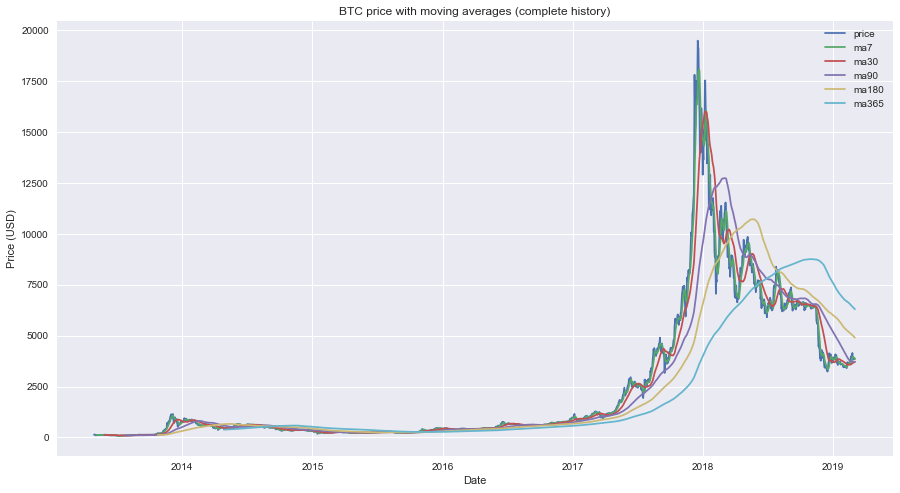

<Figure size 576x396 with 0 Axes>

In [14]:
btc_final.plot(figsize=(15, 8))

plt.title("BTC price with moving averages (complete history)")
plt.ylabel("Price (USD)")
plt.xlabel("Date")

plt.show()
plt.clf()

Since the price of BTC has increased so much over the years, a lot of the price action in those intial years gets lost on us when looking at the entire price history like this. To remedy this, let's plot the log price of BTC:

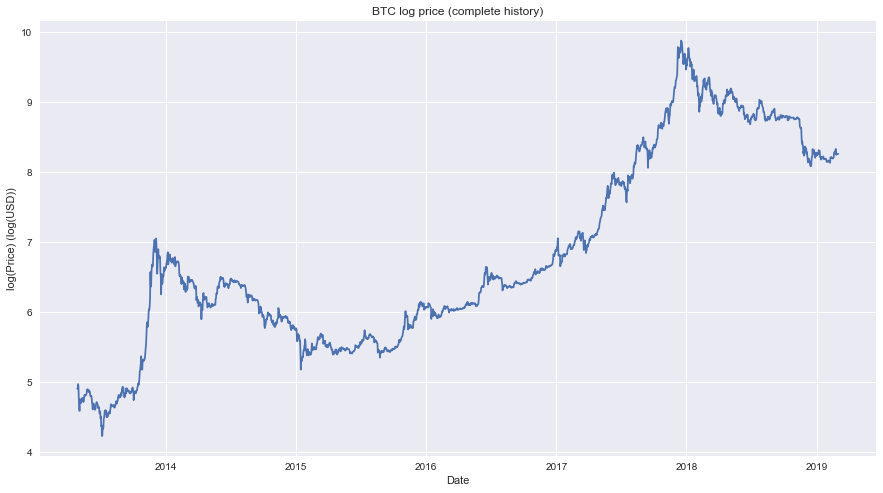

<Figure size 576x396 with 0 Axes>

In [15]:
btc_final["log_price"] = np.log(btc_final["price"])

btc_final["log_price"].plot(figsize=(15, 8))

plt.title("BTC log price (complete history)")
plt.ylabel("log(Price) (log(USD))")
plt.xlabel("Date")

plt.show()
plt.clf()

It's now clearer from the above graph (in a way that wasn't as apparent in the previous one) how significant the 2013 BTC bull run was.

We can now also discern what the price action was like between 2014 and 2017, which wasn't possible in the previous graph.

## An overview of the return data

Let's now take a look at the distribution of BTC's daily *returns*:

In [16]:
btc_final["return_daily"] = btc_final["price"].pct_change()

btc_final[["price", "return_daily"]].head()

,price,return_daily
date,,
2013-04-28,135.30,NaN
2013-04-29,134.44,-0.006356
2013-04-30,144.00,0.071110
2013-05-01,139.00,-0.034722
2013-05-02,116.38,-0.162734


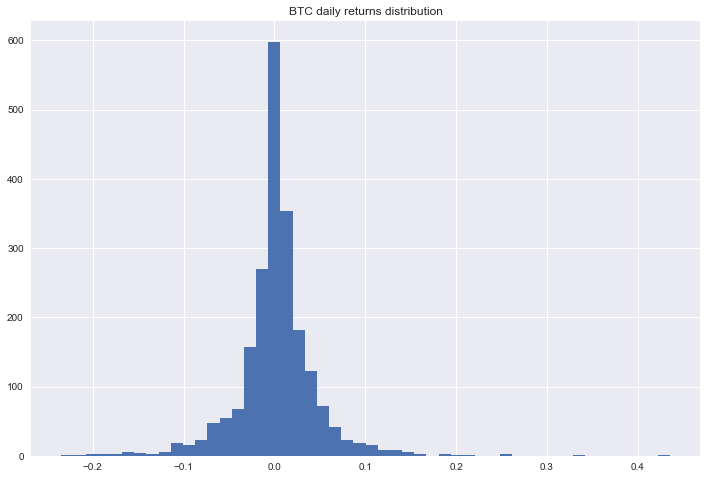

<Figure size 576x396 with 0 Axes>

In [17]:
btc_final["return_daily"].hist(bins=50, figsize=(12, 8))
plt.title("BTC daily returns distribution")
plt.show()
plt.clf()

From the above histogram we can see that BTC's daily returns vary fairly widely. There were days when BTC gained over 40% and days when it lost more than 20% of it's value.

Let's take a closer look at the greatest daily decreases and increses in price:

In [18]:
btc_greatest_falls = btc_final.sort_values("return_daily")[["price", "return_daily"]].head(20)

btc_greatest_falls

,price,return_daily
date,,
2013-12-19,519.06,-0.234651
2015-01-15,176.90,-0.209880
2013-12-07,835.32,-0.198642
2013-12-17,706.37,-0.197608
2013-11-20,577.98,-0.189096
2017-09-15,3166.30,-0.182968
2014-03-28,477.14,-0.177713
2014-04-11,363.71,-0.177610
2018-01-17,11431.10,-0.173821


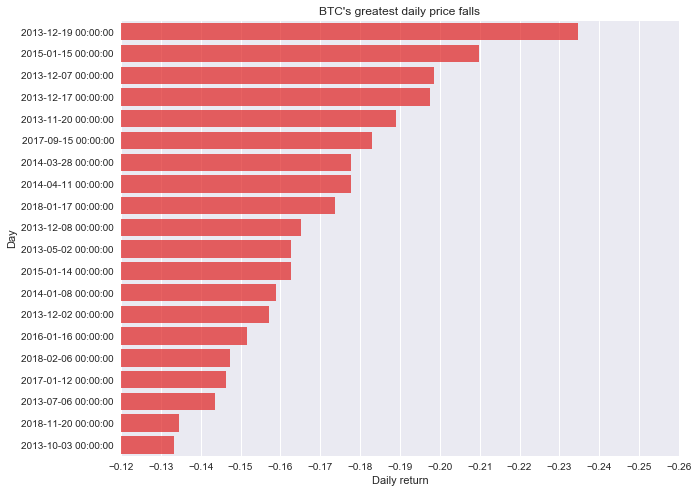

<Figure size 576x396 with 0 Axes>

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x = "return_daily",
            y = btc_greatest_falls.index,
            data = btc_greatest_falls,
            orient="h",
            order=btc_greatest_falls.index,
            color="red",
            alpha=0.7)

plt.title("BTC's greatest daily price falls")
plt.ylabel("Day")
plt.xlabel("Daily return")

x_axis = np.arange(-0.12, -0.26, step=-0.01)
plt.xlim((x_axis[0], x_axis[-1]))
plt.xticks(x_axis)

plt.show()
plt.clf()

In [20]:
btc_greatest_rises = btc_final.sort_values("return_daily", ascending=False)[["price", "return_daily"]].head(20)

btc_greatest_rises

,price,return_daily
date,,
2013-11-19,712.76,0.435338
2013-12-20,694.22,0.337456
2017-07-21,2838.41,0.250461
2017-12-08,17802.90,0.247916
2013-11-22,724.07,0.218317
2017-12-07,14266.10,0.196479
2014-03-04,668.24,0.187856
2015-01-16,209.07,0.181854
2014-11-13,427.27,0.161123


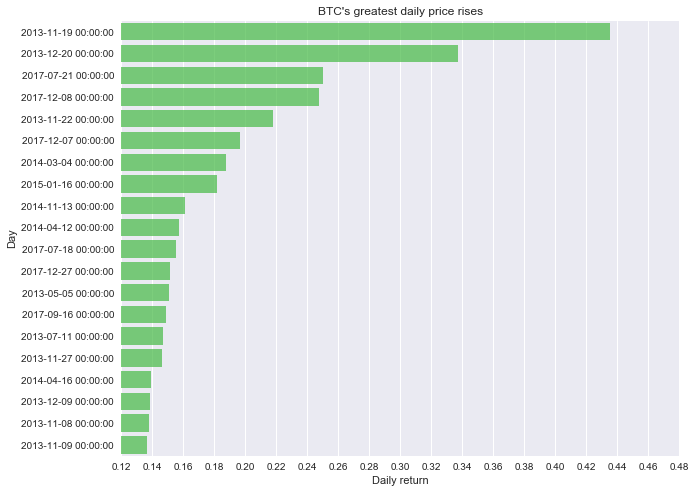

<Figure size 576x396 with 0 Axes>

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x = "return_daily",
            y = btc_greatest_rises.index,
            data = btc_greatest_rises,
            orient="h",
            order=btc_greatest_rises.index,
            color="limegreen",
            alpha=0.7)

plt.title("BTC's greatest daily price rises")
plt.ylabel("Day")
plt.xlabel("Daily return")

x_axis = np.arange(0.12, 0.50, step=0.02)
plt.xlim((x_axis[0], x_axis[-1]))
plt.xticks(x_axis)

plt.show()
plt.clf()

Looking at the greatest daily price falls and rises, it seems that most of these extreme values happened in 2013 or 2014 (although 2017 and early 2018 also had a fair number of extreme daily returns), which suggests that BTC's daily returns are becoming less extreme over the years.

We can check whether that is actually the case by taking a look at the rolling volatility (standard deviation) of BTC returns over the years:

In [22]:
btc_final["rol_std_7"] = btc_final["return_daily"].rolling(window=7).std()
btc_final["rol_std_30"] = btc_final["return_daily"].rolling(window=30).std()
btc_final["rol_std_90"] = btc_final["return_daily"].rolling(window=90).std()
btc_final["rol_std_180"] = btc_final["return_daily"].rolling(window=180).std()
btc_final["rol_std_365"] = btc_final["return_daily"].rolling(window=365).std()

#btc_final

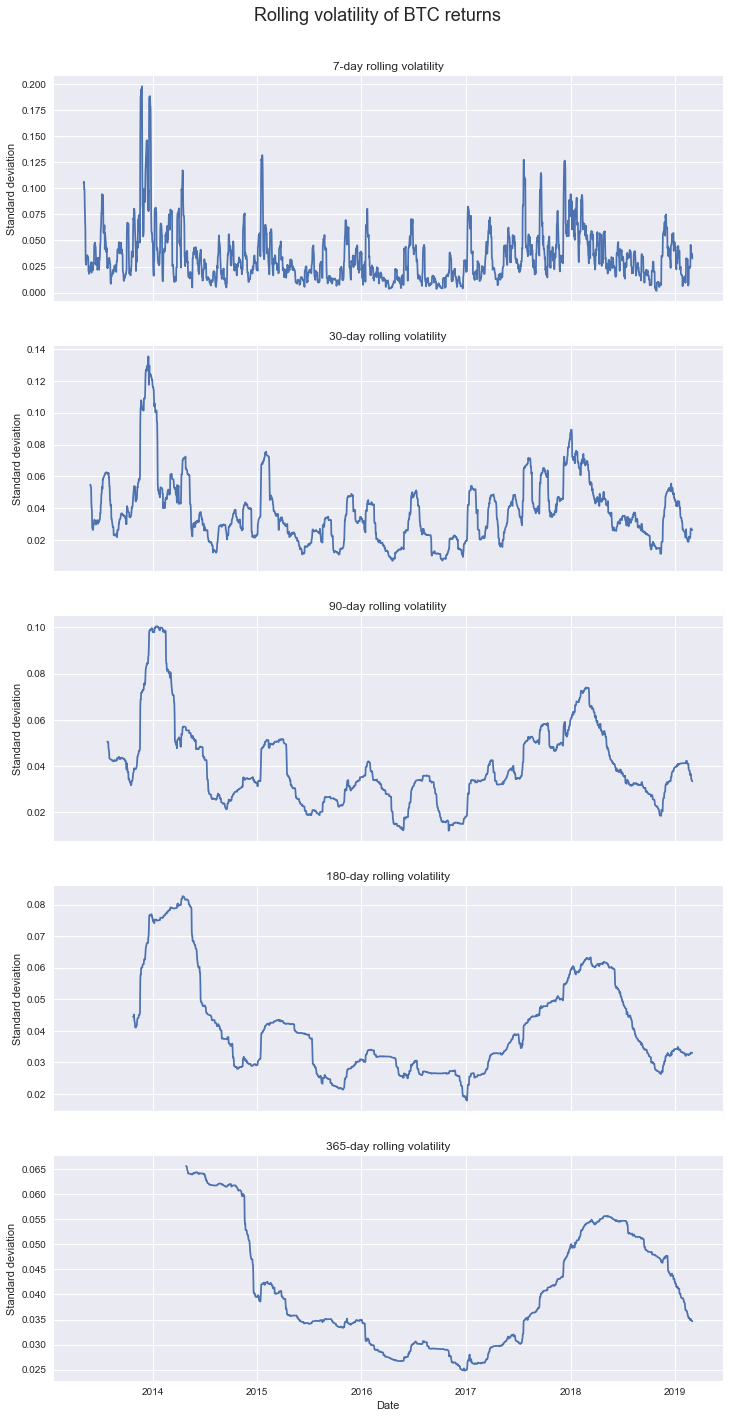

<Figure size 576x396 with 0 Axes>

In [23]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, ncols=1, figsize=(12, 24), sharex=True, sharey=False)

btc_final["rol_std_7"].plot(ax=ax0)
btc_final["rol_std_30"].plot(ax=ax1)
btc_final["rol_std_90"].plot(ax=ax2)
btc_final["rol_std_180"].plot(ax=ax3)
btc_final["rol_std_365"].plot(ax=ax4)

plt.suptitle("Rolling volatility of BTC returns", fontsize=18, y=0.92)
ax0.set(title="7-day rolling volatility", ylabel="Standard deviation")
ax1.set(title="30-day rolling volatility", ylabel="Standard deviation")
ax2.set(title="90-day rolling volatility", ylabel="Standard deviation")
ax3.set(title="180-day rolling volatility", ylabel="Standard deviation")
ax4.set(title="365-day rolling volatility", ylabel="Standard deviation")
plt.xlabel("Date")

plt.show()
plt.clf()

Indeed, the graphs above clearly show BTC's volatility was highest in 2013 and early 2014, and that volatility picked up again in late 2017 and early 2018, just as we had suspected from examining the greatest daily price falls and rises.

Volatility, however, merely quantifies the dispersion of returns in a particular time-period, but it tells us nothing about the direction of these returns. Were the periods of high volatility we identified above associated with high or low returns? We can check by computing the cumulative returns for each rolling window used above and then plotting them against their respective volatilities.

In [24]:
btc_final["rol_cumret_7"] = (1 + btc_final["return_daily"]).rolling(window=7).apply(np.prod, raw=True) - 1
btc_final["rol_cumret_30"] = (1 + btc_final["return_daily"]).rolling(window=30).apply(np.prod, raw=True) - 1
btc_final["rol_cumret_90"] = (1 + btc_final["return_daily"]).rolling(window=90).apply(np.prod, raw=True) - 1
btc_final["rol_cumret_180"] = (1 + btc_final["return_daily"]).rolling(window=180).apply(np.prod, raw=True) - 1
btc_final["rol_cumret_365"] = (1 + btc_final["return_daily"]).rolling(window=365).apply(np.prod, raw=True) - 1

#btc_final

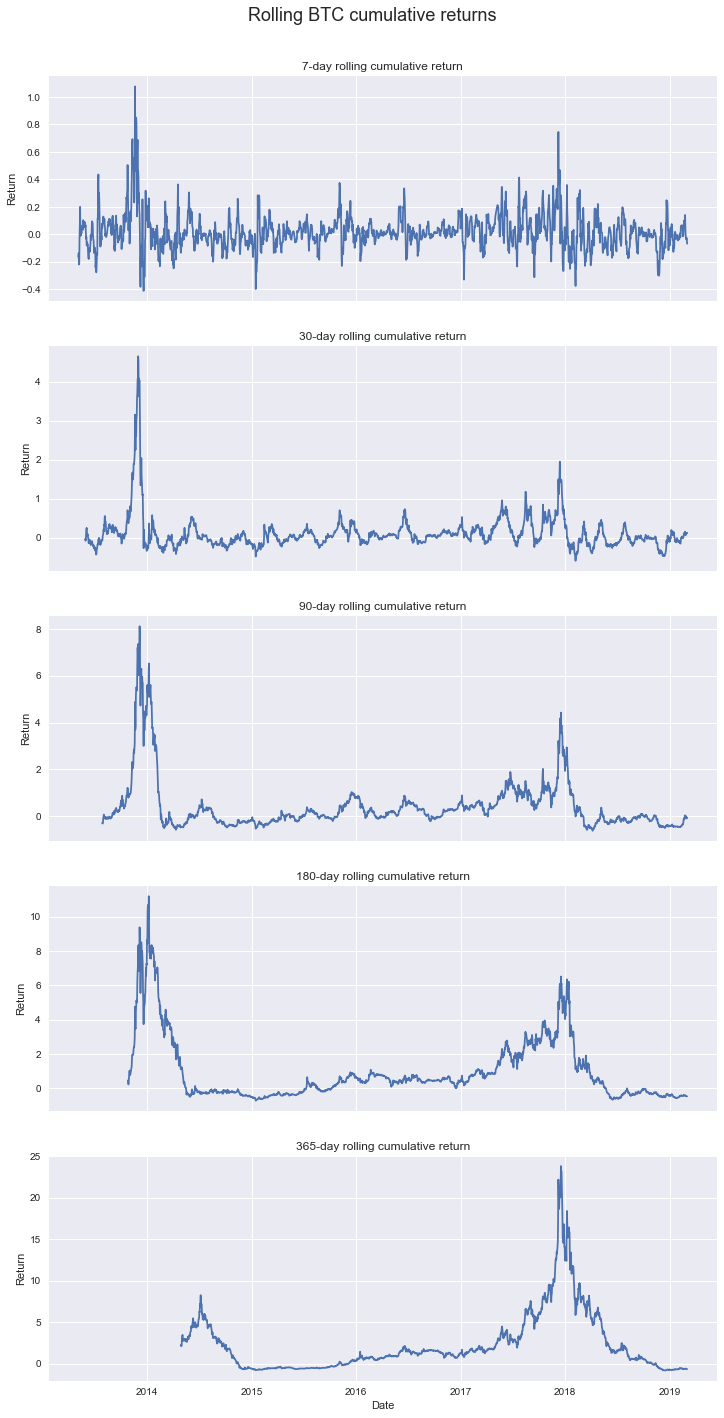

<Figure size 576x396 with 0 Axes>

In [25]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, ncols=1, figsize=(12, 24), sharex=True, sharey=False)

btc_final["rol_cumret_7"].plot(ax=ax0)
btc_final["rol_cumret_30"].plot(ax=ax1)
btc_final["rol_cumret_90"].plot(ax=ax2)
btc_final["rol_cumret_180"].plot(ax=ax3)
btc_final["rol_cumret_365"].plot(ax=ax4)

plt.suptitle("Rolling BTC cumulative returns", fontsize=18, y=0.92)
ax0.set(title="7-day rolling cumulative return", ylabel="Return")
ax1.set(title="30-day rolling cumulative return", ylabel="Return")
ax2.set(title="90-day rolling cumulative return", ylabel="Return")
ax3.set(title="180-day rolling cumulative return", ylabel="Return")
ax4.set(title="365-day rolling cumulative return", ylabel="Return")
plt.xlabel("Date")

plt.show()
plt.clf()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


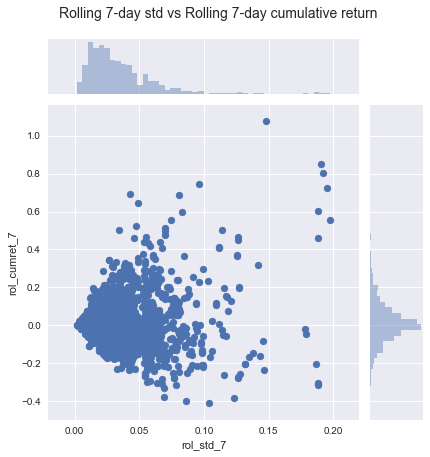

<Figure size 576x396 with 0 Axes>

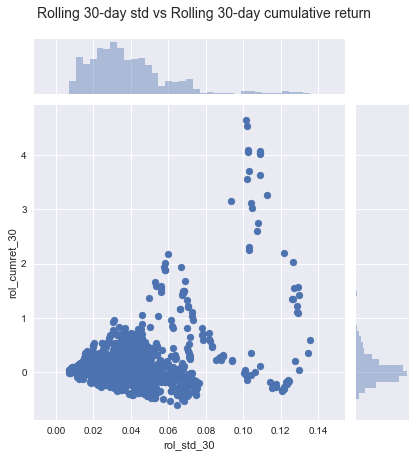

<Figure size 576x396 with 0 Axes>

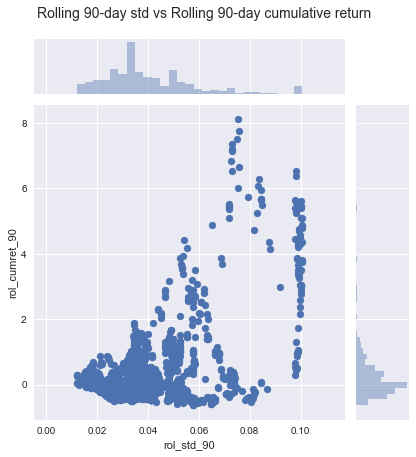

<Figure size 576x396 with 0 Axes>

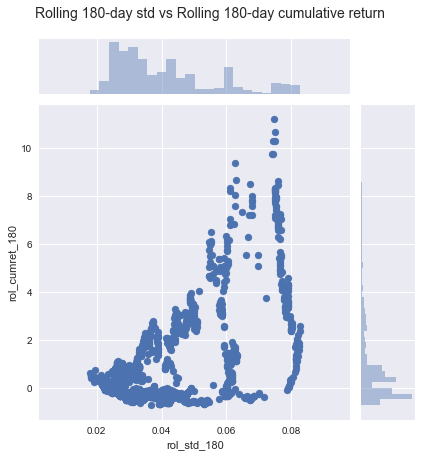

<Figure size 576x396 with 0 Axes>

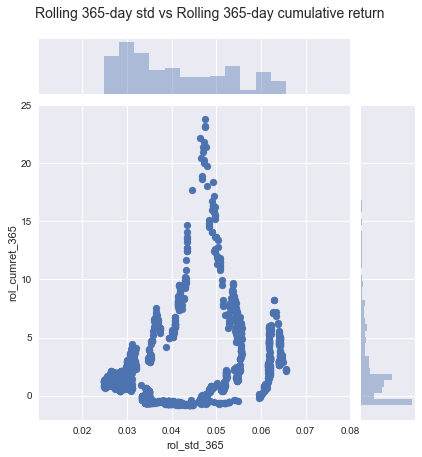

<Figure size 576x396 with 0 Axes>

In [26]:
sns.jointplot(x="rol_std_7", y="rol_cumret_7", data=btc_final)
plt.suptitle("Rolling 7-day std vs Rolling 7-day cumulative return", y=1.05, fontsize=14)
plt.show()
plt.clf()

sns.jointplot(x="rol_std_30", y="rol_cumret_30", data=btc_final)
plt.suptitle("Rolling 30-day std vs Rolling 30-day cumulative return", y=1.05, fontsize=14)
plt.show()
plt.clf()

sns.jointplot(x="rol_std_90", y="rol_cumret_90", data=btc_final)
plt.suptitle("Rolling 90-day std vs Rolling 90-day cumulative return", y=1.05, fontsize=14)
plt.show()
plt.clf()

sns.jointplot(x="rol_std_180", y="rol_cumret_180", data=btc_final)
plt.suptitle("Rolling 180-day std vs Rolling 180-day cumulative return", y=1.05, fontsize=14)
plt.show()
plt.clf()

sns.jointplot(x="rol_std_365", y="rol_cumret_365", data=btc_final)
plt.suptitle("Rolling 365-day std vs Rolling 365-day cumulative return", y=1.05, fontsize=14)
plt.show()
plt.clf()

As we can see from the scatter plots above, there doesn't seem to be a straightforward linear relationship between the volatility and the cumulative returns in the rolling windows we analyzed. However, to check whether the [asymmetry of arithmetic returns](https://en.wikipedia.org/wiki/Rate_of_return#Symmetry_of_logarithmic_returns) may be incorrectly leading us to believe there isn't a linear relationship between BTC's volatility and it's cumulative returns, I've done the same analysis as above but for the logarithmic returns instead:

### Logarithmic returns

In [27]:
btc_final["log_return_daily"] = np.log(btc_final["price"]/btc_final["price"].shift(1))

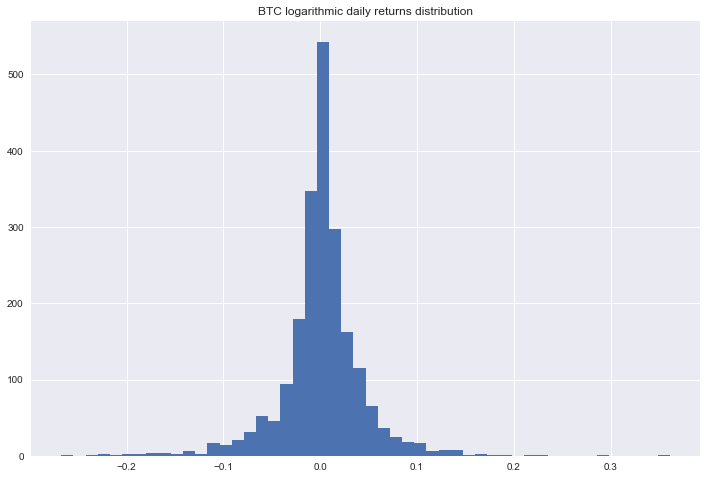

<Figure size 576x396 with 0 Axes>

In [28]:
btc_final["log_return_daily"].hist(bins=50, figsize=(12, 8))
plt.title("BTC logarithmic daily returns distribution")
plt.show()
plt.clf()

In [29]:
btc_final["rol_cum_log_ret_7"] = btc_final["log_return_daily"].rolling(window=7).sum()
btc_final["rol_cum_log_ret_30"] = btc_final["log_return_daily"].rolling(window=30).sum()
btc_final["rol_cum_log_ret_90"] = btc_final["log_return_daily"].rolling(window=90).sum()
btc_final["rol_cum_log_ret_180"] = btc_final["log_return_daily"].rolling(window=180).sum()
btc_final["rol_cum_log_ret_365"] = btc_final["log_return_daily"].rolling(window=365).sum()

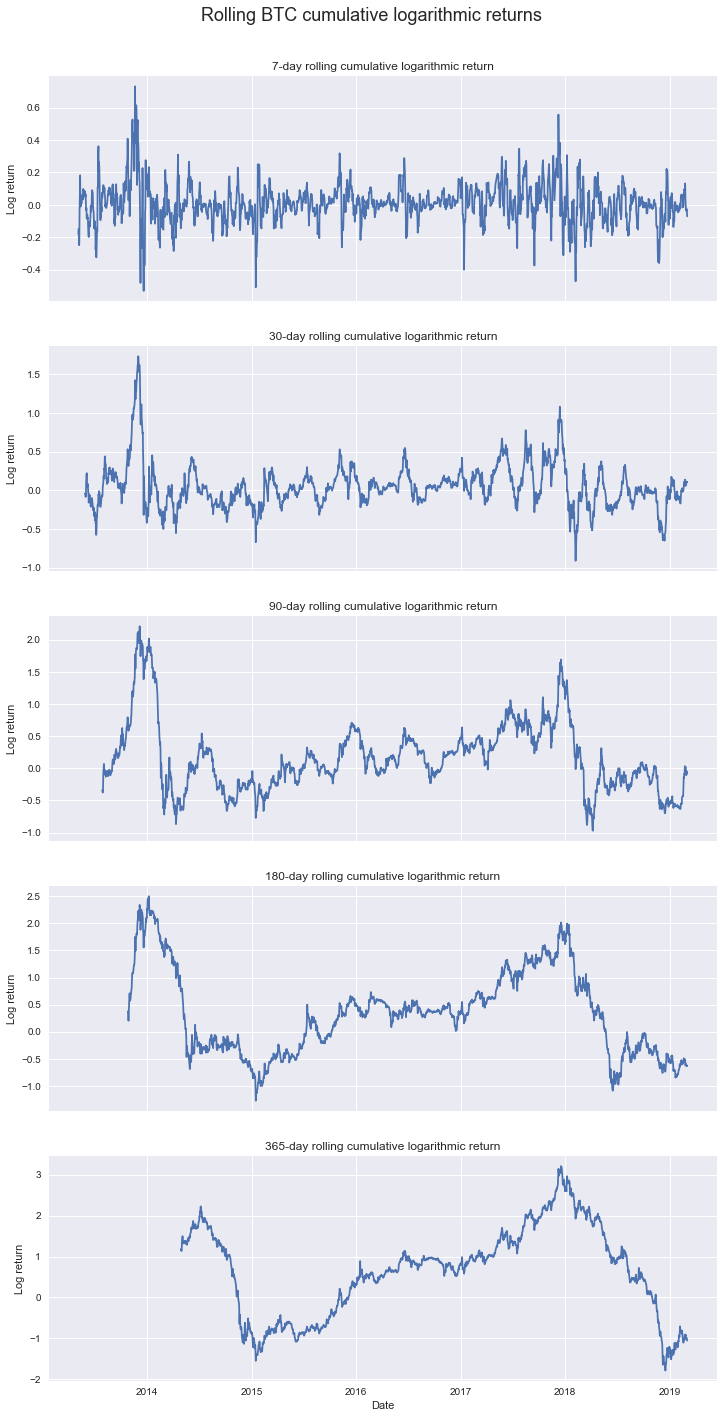

<Figure size 576x396 with 0 Axes>

In [30]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, ncols=1, figsize=(12, 24), sharex=True, sharey=False)

btc_final["rol_cum_log_ret_7"].plot(ax=ax0)
btc_final["rol_cum_log_ret_30"].plot(ax=ax1)
btc_final["rol_cum_log_ret_90"].plot(ax=ax2)
btc_final["rol_cum_log_ret_180"].plot(ax=ax3)
btc_final["rol_cum_log_ret_365"].plot(ax=ax4)

plt.suptitle("Rolling BTC cumulative logarithmic returns", fontsize=18, y=0.92)
ax0.set(title="7-day rolling cumulative logarithmic return", ylabel="Log return")
ax1.set(title="30-day rolling cumulative logarithmic return", ylabel="Log return")
ax2.set(title="90-day rolling cumulative logarithmic return", ylabel="Log return")
ax3.set(title="180-day rolling cumulative logarithmic return", ylabel="Log return")
ax4.set(title="365-day rolling cumulative logarithmic return", ylabel="Log return")
plt.xlabel("Date")

plt.show()
plt.clf()

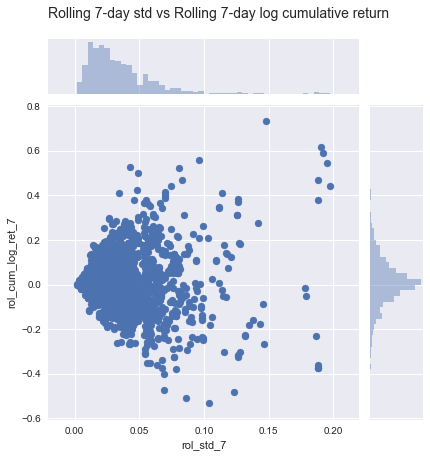

<Figure size 576x396 with 0 Axes>

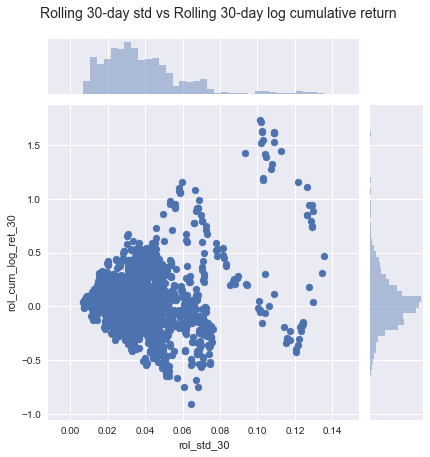

<Figure size 576x396 with 0 Axes>

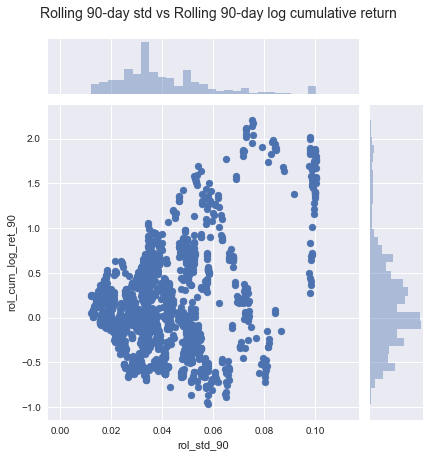

<Figure size 576x396 with 0 Axes>

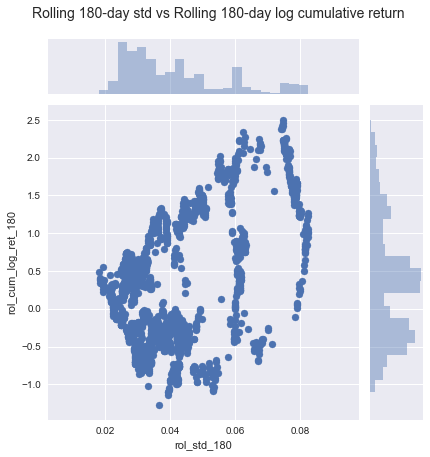

<Figure size 576x396 with 0 Axes>

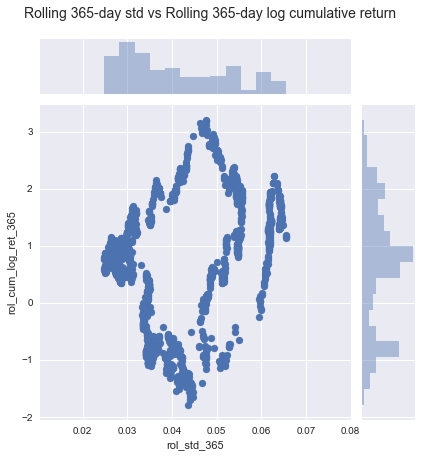

<Figure size 576x396 with 0 Axes>

In [31]:
sns.jointplot(x="rol_std_7", y="rol_cum_log_ret_7", data=btc_final)
plt.suptitle("Rolling 7-day std vs Rolling 7-day log cumulative return", y=1.05, fontsize=14)
plt.show()
plt.clf()

sns.jointplot(x="rol_std_30", y="rol_cum_log_ret_30", data=btc_final)
plt.suptitle("Rolling 30-day std vs Rolling 30-day log cumulative return", y=1.05, fontsize=14)
plt.show()
plt.clf()

sns.jointplot(x="rol_std_90", y="rol_cum_log_ret_90", data=btc_final)
plt.suptitle("Rolling 90-day std vs Rolling 90-day log cumulative return", y=1.05, fontsize=14)
plt.show()
plt.clf()

sns.jointplot(x="rol_std_180", y="rol_cum_log_ret_180", data=btc_final)
plt.suptitle("Rolling 180-day std vs Rolling 180-day log cumulative return", y=1.05, fontsize=14)
plt.show()
plt.clf()

sns.jointplot(x="rol_std_365", y="rol_cum_log_ret_365", data=btc_final)
plt.suptitle("Rolling 365-day std vs Rolling 365-day log cumulative return", y=1.05, fontsize=14)
plt.show()
plt.clf()

From the graphs above we can see that there still doesn't seem to be a straightforward linear relationship between the two variables.

So, to answer the question we had above, the periods of high volatility in BTC's returns don't seem to be more strongly associated with periods of positive returns than with periods of negative returns (or vice-versa). Although we can see in the last graph above that there was one cluster of periods with the highest volatility which had mostly positive returns (which corresponds to the 2013-early 2014 period):

![](img/std_vs_logret.jpg)

### Risk adjusted returns

Out of curiosity, we can use the cumulative returns and volatilities we've already computed to explore BTC's risk adjusted return (that is, the return per unit of risk) over the years:

$$Rolling\,\,risk\,\,adjusted\,\,return = \frac{Rolling\,\,cumulative\,\,return}{Rolling\,\,standard\,\,deviation}$$

Note that in doing so we are using volatility as a measure of risk (which you [may or may not agree with](https://www.google.com/search?q=volatility+as+a+measure+of+risk)).

Also note that what we are computing here is **NOT** BTC's [Sharpe ratio](https://en.wikipedia.org/wiki/Sharpe_ratio), as we are using total return, and not excess return.

In [32]:
btc_final["rol_rar_7"] = btc_final["rol_cumret_7"]/btc_final["rol_std_7"]
btc_final["rol_rar_30"] = btc_final["rol_cumret_30"]/btc_final["rol_std_30"]
btc_final["rol_rar_90"] = btc_final["rol_cumret_90"]/btc_final["rol_std_90"]
btc_final["rol_rar_180"] = btc_final["rol_cumret_180"]/btc_final["rol_std_180"]
btc_final["rol_rar_365"] = btc_final["rol_cumret_365"]/btc_final["rol_std_365"]

#btc_final

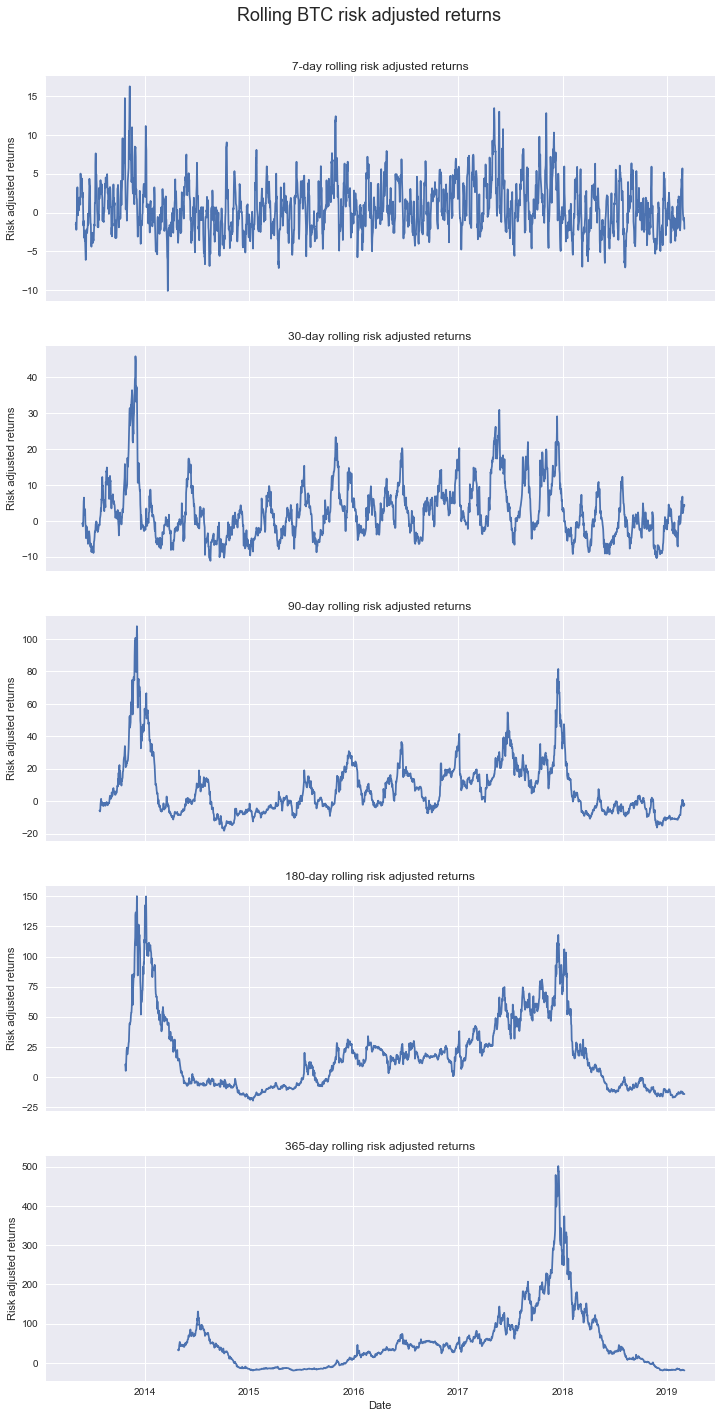

<Figure size 576x396 with 0 Axes>

In [33]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, ncols=1, figsize=(12, 24), sharex=True, sharey=False)

btc_final["rol_rar_7"].plot(ax=ax0)
btc_final["rol_rar_30"].plot(ax=ax1)
btc_final["rol_rar_90"].plot(ax=ax2)
btc_final["rol_rar_180"].plot(ax=ax3)
btc_final["rol_rar_365"].plot(ax=ax4)

plt.suptitle("Rolling BTC risk adjusted returns", fontsize=18, y=0.92)
ax0.set(title="7-day rolling risk adjusted returns", ylabel="Risk adjusted returns")
ax1.set(title="30-day rolling risk adjusted returns", ylabel="Risk adjusted returns")
ax2.set(title="90-day rolling risk adjusted returns", ylabel="Risk adjusted returns")
ax3.set(title="180-day rolling risk adjusted returns", ylabel="Risk adjusted returns")
ax4.set(title="365-day rolling risk adjusted returns", ylabel="Risk adjusted returns")
plt.xlabel("Date")

plt.show()
plt.clf()

## Bear and bull cycles

Now let's explore BTC's longer-term trends and see what it's bear and bull cycles looked like.

### Bear markets

How do you define a bear market?

Some definitions confine a bear market to a 20% price decrease over at least 2 months, but I'd argue that definition is too inflexible even when applied to more traditional assets, since the 20% decrease and 2 months are totally arbitrary numbers. Given that we've already seen above that BTC's price can move up or down that much in a single day, we're going to need to define a bear market some other way.

Better still, let's not define it in such inflexible terms and, instead, let's start out by looking at BTC's main price decreases over time. Afterall, that's what we mean when we use the term *bear market*: a period of falling prices. So let's look at all of the cumulative BTC [peak-to-trough drawdowns](https://www.investopedia.com/terms/p/peak-to-valley-drawdown.asp) over the years:

In [34]:
btc_final["cum_max"] = btc_final["price"].cummax()
btc_final["drawdowns"] = (btc_final["price"] - btc_final["cum_max"])/btc_final["cum_max"]

btc_final[["price", "cum_max", "drawdowns"]].head()

,price,cum_max,drawdowns
date,,,
2013-04-28,135.30,135.3,0.000000
2013-04-29,134.44,135.3,-0.006356
2013-04-30,144.00,144.0,0.000000
2013-05-01,139.00,144.0,-0.034722
2013-05-02,116.38,144.0,-0.191806


Computing the date of the last highest BTC price for each date in our price Series:

In [35]:
drawdown_series = btc_final["drawdowns"].copy().reset_index()
drawdown_series, date_series = drawdown_series["drawdowns"].copy(), drawdown_series["date"].copy()
max_price_date_series = pd.Series(index = drawdown_series.index)

for i in drawdown_series.index:
    if(drawdown_series[i] == 0.0):
        max_price_date = date_series[i]
        max_price_date_series[i] = max_price_date
    else:
        max_price_date_series[i] = max_price_date

Computing the length of time between each maximum price:

In [36]:
days_between_max_prices_series = pd.Series(index = drawdown_series.index)

for i in drawdown_series.index:
    days_between_max_prices_series[i] = date_series[i] - max_price_date_series[i]

Now we need to classify these into unique drawdowns so that we can later order them by intensity to see which were the worst ones:

In [37]:
drawdown_id_series = pd.Series(index = drawdown_series.index)

drawdown_counter = 0

for i in drawdown_series.index[:-1]:
    if(days_between_max_prices_series[i + 1] == dt.timedelta(0)):
        drawdown_id_series[i] = drawdown_counter
        drawdown_counter += 1
    else:
        drawdown_id_series[i] = drawdown_counter

if(drawdown_series.iloc[-1] < 0.0):
    drawdown_id_series.iloc[-1] = drawdown_counter

drawdown_id_series = drawdown_id_series.astype('category')

Joining it with our `btc_final` DataFrame:

In [38]:
max_price_date_series.name = "max_price_date"
max_price_date_series.index = btc_final.index

days_between_max_prices_series.name = "days_between_max_prices"
days_between_max_prices_series.index = btc_final.index

drawdown_id_series.name = "drawdown_id"
drawdown_id_series.index = btc_final.index

btc_final = btc_final.join(max_price_date_series, how="left")
btc_final = btc_final.join(days_between_max_prices_series, how="left")
btc_final = btc_final.join(drawdown_id_series, how="left")

btc_final[["price", "cum_max", "drawdowns", "max_price_date", "days_between_max_prices", "drawdown_id"]].tail()

,price,cum_max,drawdowns,max_price_date,days_between_max_prices,drawdown_id
date,,,,,,
2019-02-27,3857.48,19475.8,-0.801935,2017-12-17 00:00:00,437 days 00:00:00,109.0
2019-02-28,3848.26,19475.8,-0.802408,2017-12-17 00:00:00,438 days 00:00:00,109.0
2019-03-01,3853.76,19475.8,-0.802126,2017-12-17 00:00:00,439 days 00:00:00,109.0
2019-03-02,3855.32,19475.8,-0.802046,2017-12-17 00:00:00,440 days 00:00:00,109.0
2019-03-03,3862.27,19475.8,-0.801689,2017-12-17 00:00:00,441 days 00:00:00,109.0


Now we can order these drawdowns by intensity:

In [39]:
drawdowns_df = btc_final[["price", "cum_max", "drawdowns", "max_price_date",
                          "days_between_max_prices", "drawdown_id"]]
drawdowns_df = drawdowns_df.sort_values("drawdowns").reset_index()

worst_drawdowns = drawdowns_df.groupby("drawdown_id").first().sort_values("drawdowns")
worst_drawdowns = worst_drawdowns[worst_drawdowns["drawdowns"] < 0]

worst_drawdowns.head()

,date,price,cum_max,drawdowns,max_price_date,days_between_max_prices
drawdown_id,,,,,,
31.0,2015-01-15,176.90,1152.73,-0.846538,2013-12-05,406 days 00:00:00
109.0,2018-12-16,3236.27,19475.80,-0.833831,2017-12-17,364 days 00:00:00
1.0,2013-07-06,68.50,144.00,-0.524306,2013-04-30,67 days 00:00:00
78.0,2017-09-15,3166.30,4901.42,-0.354004,2017-09-02,13 days 00:00:00
65.0,2017-07-17,1932.62,2953.22,-0.345589,2017-06-12,35 days 00:00:00


From the above table we can see that since 2013 (the start of our time-series) BTC has gone through two 80+% drawdowns, with the most recent one beginning on December 17th 2017 and reaching it's lowest point 364 days later on December 16 2018. Note that as of March 2019 (when I'm writing this) BTC hasn't reached new historical highs, so this still has the potential to outdo the greatest drawdown of 84.65%.

Let's highlight all of these cumulative peak and trough points on BTC's price graph (peaks are marked as green dots and troughs as red dots):

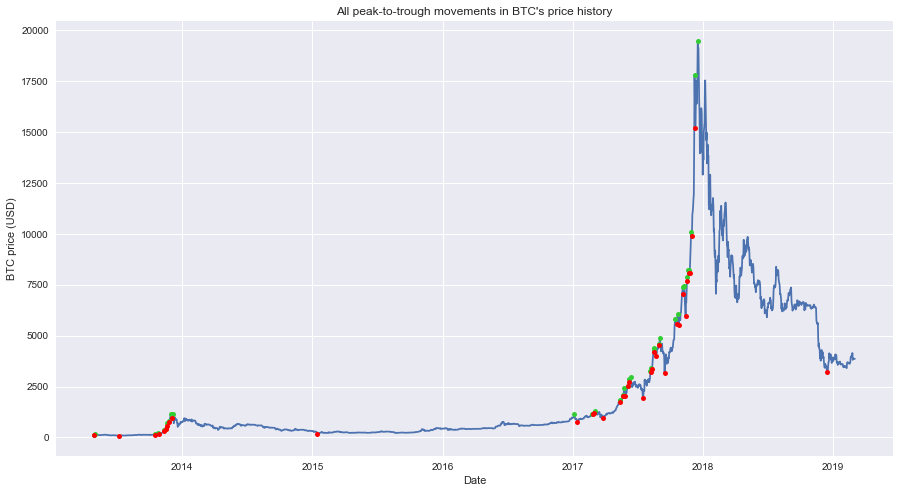

<Figure size 576x396 with 0 Axes>

In [40]:
peak_points = worst_drawdowns["cum_max"].reset_index(drop=True)
peak_points.index = worst_drawdowns["max_price_date"]

trough_points = worst_drawdowns["price"].reset_index(drop=True)
trough_points.index = worst_drawdowns["date"]

fig, ax = plt.subplots(figsize=(15, 8))

plt.plot(btc_final[:].index, btc_final["price"][:])
plt.plot(peak_points[:].index, peak_points[:],
         color="limegreen",
         linestyle="",
         marker=".", markersize=10)
plt.plot(trough_points[:].index, trough_points[:],
         color="red",
         linestyle="",
         marker=".", markersize=10)

plt.title("All peak-to-trough movements in BTC's price history")
plt.xlabel("Date")
plt.ylabel("BTC price (USD)")

plt.show()
plt.clf()

And using a logarithmic scale:

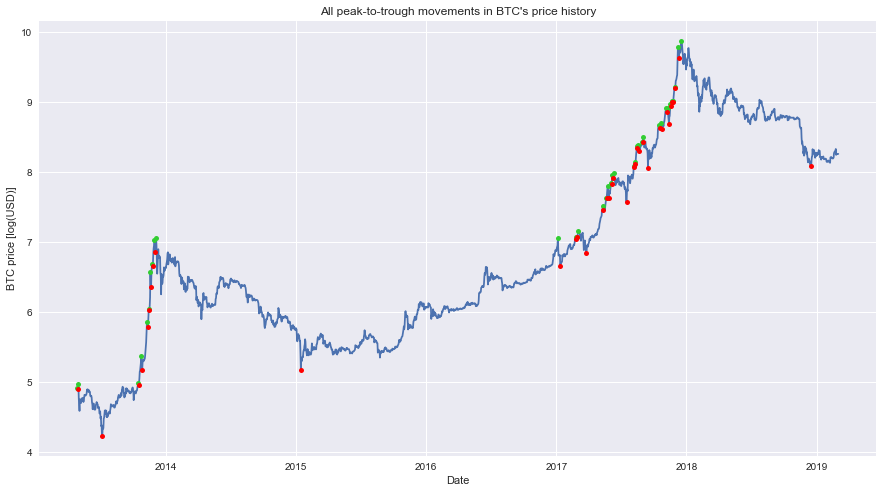

<Figure size 576x396 with 0 Axes>

In [41]:
log_peak_points = np.log(worst_drawdowns["cum_max"].reset_index(drop=True))
log_peak_points.index = worst_drawdowns["max_price_date"]

log_trough_points = np.log(worst_drawdowns["price"].reset_index(drop=True))
log_trough_points.index = worst_drawdowns["date"]

fig, ax = plt.subplots(figsize=(15, 8))

plt.plot(btc_final[:].index, btc_final["log_price"][:])
plt.plot(log_peak_points[:].index, log_peak_points[:],
         color="limegreen",
         linestyle="",
         marker=".", markersize=10)
plt.plot(log_trough_points[:].index, log_trough_points[:],
         color="red",
         linestyle="",
         marker=".", markersize=10)

plt.title("All peak-to-trough movements in BTC's price history")
plt.xlabel("Date")
plt.ylabel("BTC price [log(USD)]")

plt.show()
plt.clf()

Let's now take a closer look at the 5 worst drawdowns:

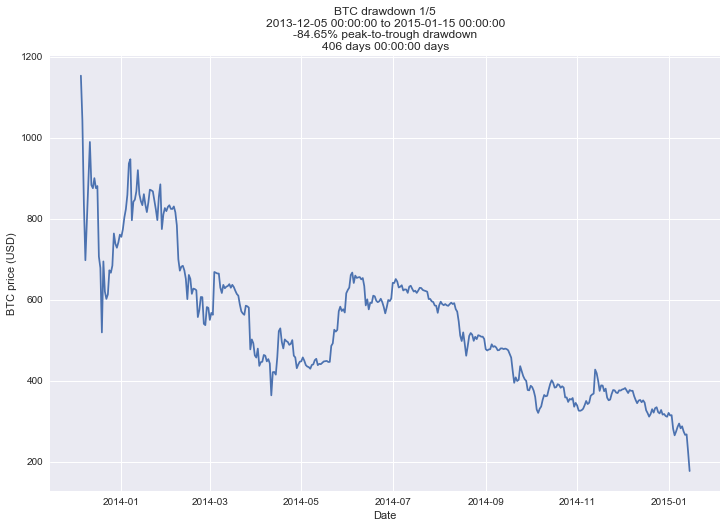

<Figure size 576x396 with 0 Axes>

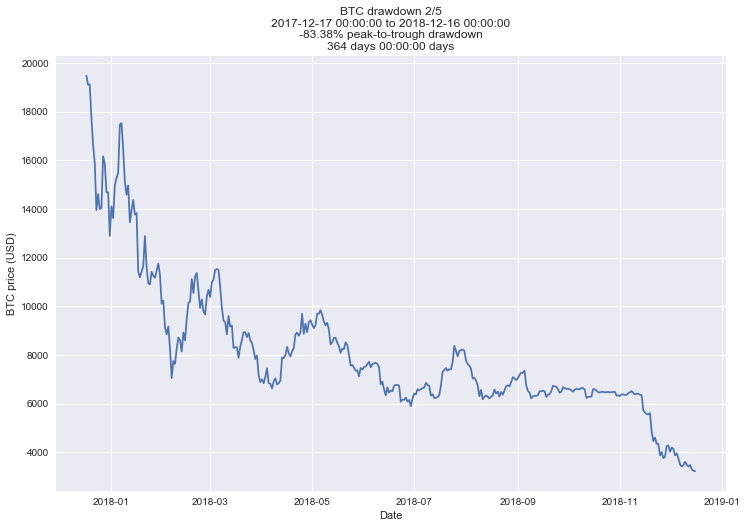

<Figure size 576x396 with 0 Axes>

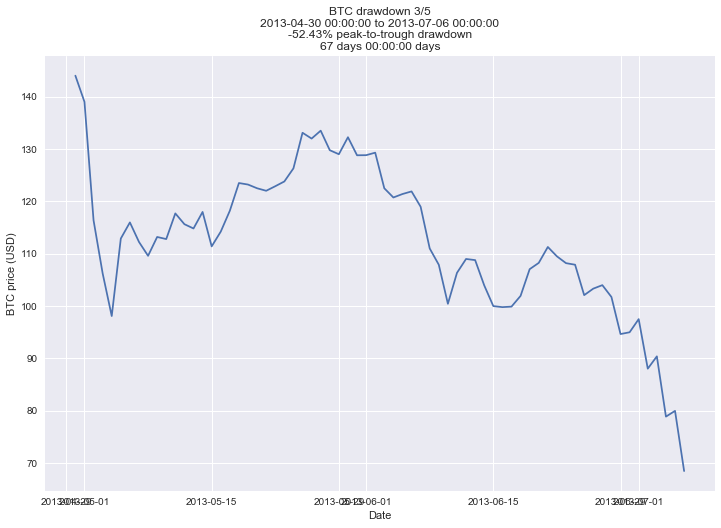

<Figure size 576x396 with 0 Axes>

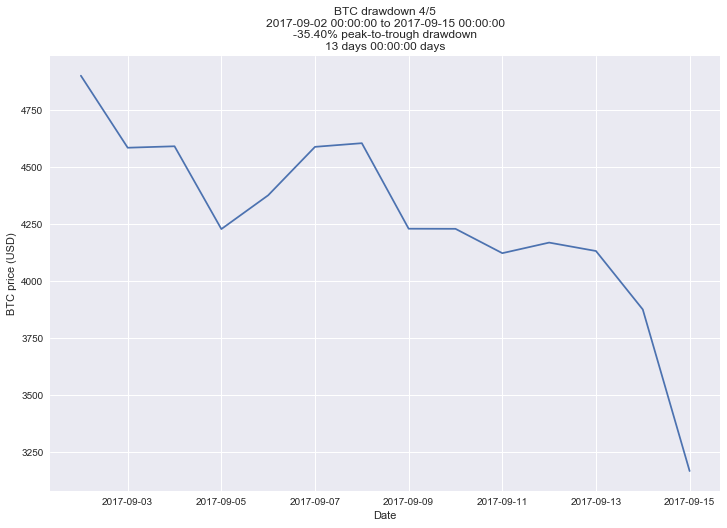

<Figure size 576x396 with 0 Axes>

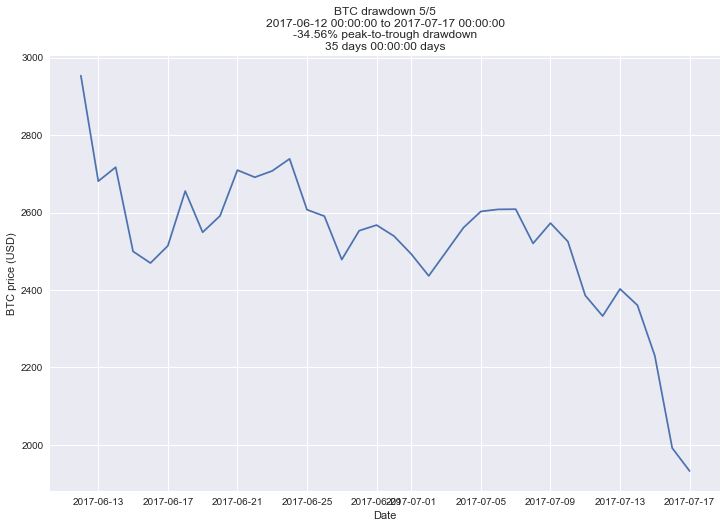

<Figure size 576x396 with 0 Axes>

In [42]:
top_worst_drawdowns = worst_drawdowns.head()

for i in range(len(top_worst_drawdowns)):
    date_range = pd.date_range(start=top_worst_drawdowns.iloc[i]["max_price_date"], end=top_worst_drawdowns.iloc[i]["date"])

    fig, ax = plt.subplots(figsize=(12, 8))

    plt.plot(date_range, btc_final.loc[date_range, "price"])
    plt.title("BTC drawdown {}/5\n{} to {}\n{:.2f}% peak-to-trough drawdown\n{} days".format(i+1,
                                                            top_worst_drawdowns.iloc[i]["max_price_date"],
                                                            top_worst_drawdowns.iloc[i]["date"],
                                                            top_worst_drawdowns.iloc[i]["drawdowns"]*100,
                                                            top_worst_drawdowns.iloc[i]["days_between_max_prices"]))
    plt.xlabel("Date")
    plt.ylabel("BTC price (USD)")
    plt.show()
    plt.clf()

Let's highlight these specific peak and trough points in BTC's price graph:

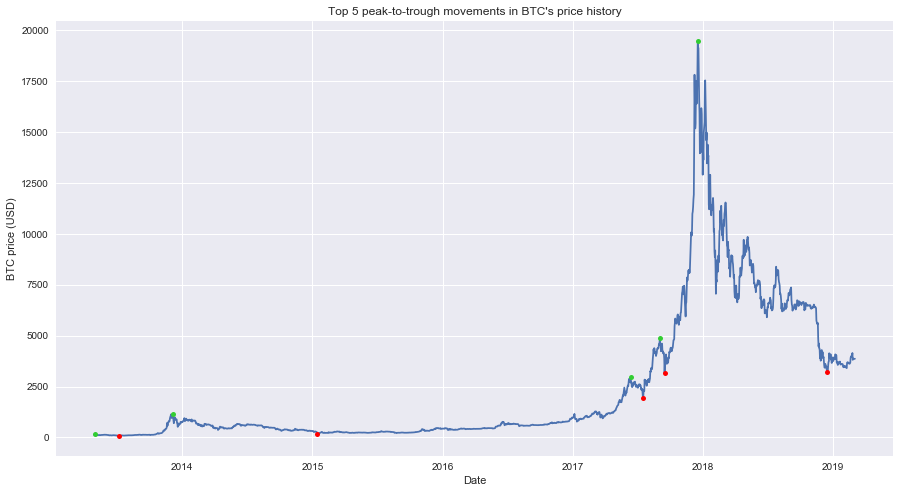

<Figure size 576x396 with 0 Axes>

In [43]:
top_peak_points = top_worst_drawdowns["cum_max"].reset_index(drop=True)
top_peak_points.index = top_worst_drawdowns["max_price_date"]

top_trough_points = top_worst_drawdowns["price"].reset_index(drop=True)
top_trough_points.index = top_worst_drawdowns["date"]

fig, ax = plt.subplots(figsize=(15, 8))

plt.plot(btc_final[:].index, btc_final["price"][:])
plt.plot(top_peak_points[:].index, top_peak_points[:],
         color="limegreen",
         linestyle="",
         marker=".", markersize=10)
plt.plot(top_trough_points[:].index, top_trough_points[:],
         color="red",
         linestyle="",
         marker=".", markersize=10)

plt.title("Top 5 peak-to-trough movements in BTC's price history")
plt.xlabel("Date")
plt.ylabel("BTC price (USD)")

plt.show()
plt.clf()

And using a logarithmic scale:

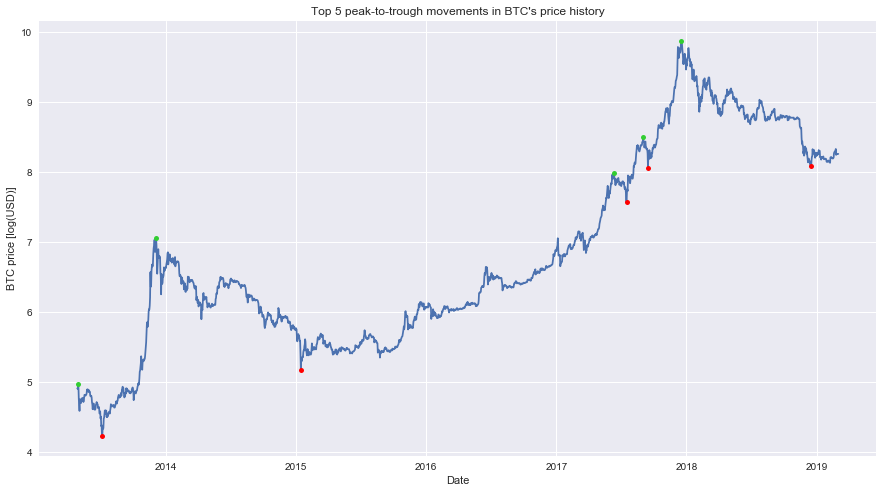

<Figure size 576x396 with 0 Axes>

In [44]:
log_top_peak_points = np.log(top_worst_drawdowns["cum_max"].reset_index(drop=True))
log_top_peak_points.index = top_worst_drawdowns["max_price_date"]

log_top_trough_points = np.log(top_worst_drawdowns["price"].reset_index(drop=True))
log_top_trough_points.index = top_worst_drawdowns["date"]

fig, ax = plt.subplots(figsize=(15, 8))

plt.plot(btc_final[:].index, btc_final["log_price"][:])
plt.plot(log_top_peak_points[:].index, log_top_peak_points[:],
         color="limegreen",
         linestyle="",
         marker=".", markersize=10)
plt.plot(log_top_trough_points[:].index, log_top_trough_points[:],
         color="red",
         linestyle="",
         marker=".", markersize=10)

plt.title("Top 5 peak-to-trough movements in BTC's price history")
plt.xlabel("Date")
plt.ylabel("BTC price [log(USD)]")

plt.show()
plt.clf()

### Bull markets

Now we can use our `worst_drawdowns` DataFrame to have a look at BTC's bull markets, that is, periods of increasing prices.

These periods will simply be the trough-to-peak movements instead of the peak-to-trough movements we examined before.

Note that I won't be using the entire `worst_drawdowns` DataFrame to select the peak and trough points, only the top entries in that DataFrame. This is because if I used the entire DataFrame, the longer-term bull movements would be broken up by relatively small drawdowns on their way up, thereby making our analysis less useful.

In [45]:
draw_ups = worst_drawdowns.head(11).sort_index().copy()
draw_ups.drop(["drawdowns", "days_between_max_prices"], axis=1, inplace=True)

draw_ups["subsequent_peak_date"] = draw_ups["max_price_date"].shift(-1)
draw_ups.drop(["max_price_date"], axis=1, inplace=True)

draw_ups["subsequent_peak_price"] = draw_ups["cum_max"].shift(-1)
draw_ups.drop(["cum_max"], axis=1, inplace=True)

draw_ups = draw_ups[:-1]
draw_ups

,date,price,subsequent_peak_date,subsequent_peak_price
drawdown_id,,,,
1.0,2013-07-06,68.50,2013-10-24,214.30
9.0,2013-10-27,176.60,2013-11-19,712.76
22.0,2013-11-20,577.98,2013-12-05,1152.73
31.0,2015-01-15,176.90,2017-01-05,1156.73
32.0,2017-01-12,775.18,2017-03-04,1277.43
37.0,2017-03-25,936.54,2017-05-25,2446.24
59.0,2017-05-28,2054.08,2017-06-12,2953.22
65.0,2017-07-17,1932.62,2017-09-02,4901.42
78.0,2017-09-15,3166.30,2017-11-09,7446.83


With this we can now compute the percentage price increase and the time between troughs and peaks:

In [46]:
draw_ups["percent_price_increase"] = (draw_ups["subsequent_peak_price"] - draw_ups["price"])/draw_ups["price"]
draw_ups["draw_up_length"] = draw_ups["subsequent_peak_date"] - draw_ups["date"]

draw_ups

,date,price,subsequent_peak_date,subsequent_peak_price,percent_price_increase,draw_up_length
drawdown_id,,,,,,
1.0,2013-07-06,68.50,2013-10-24,214.30,2.128467,110 days
9.0,2013-10-27,176.60,2013-11-19,712.76,3.036014,23 days
22.0,2013-11-20,577.98,2013-12-05,1152.73,0.994412,15 days
31.0,2015-01-15,176.90,2017-01-05,1156.73,5.538892,721 days
32.0,2017-01-12,775.18,2017-03-04,1277.43,0.647914,51 days
37.0,2017-03-25,936.54,2017-05-25,2446.24,1.611997,61 days
59.0,2017-05-28,2054.08,2017-06-12,2953.22,0.437734,15 days
65.0,2017-07-17,1932.62,2017-09-02,4901.42,1.536153,47 days
78.0,2017-09-15,3166.30,2017-11-09,7446.83,1.351903,55 days


Now we can order these price increases by intensity:

In [47]:
top_draw_ups = draw_ups.sort_values("percent_price_increase", ascending=False)

top_draw_ups

,date,price,subsequent_peak_date,subsequent_peak_price,percent_price_increase,draw_up_length
drawdown_id,,,,,,
31.0,2015-01-15,176.90,2017-01-05,1156.73,5.538892,721 days
9.0,2013-10-27,176.60,2013-11-19,712.76,3.036014,23 days
91.0,2017-11-13,5938.25,2017-12-17,19475.80,2.279720,34 days
1.0,2013-07-06,68.50,2013-10-24,214.30,2.128467,110 days
37.0,2017-03-25,936.54,2017-05-25,2446.24,1.611997,61 days
65.0,2017-07-17,1932.62,2017-09-02,4901.42,1.536153,47 days
78.0,2017-09-15,3166.30,2017-11-09,7446.83,1.351903,55 days
22.0,2013-11-20,577.98,2013-12-05,1152.73,0.994412,15 days
32.0,2017-01-12,775.18,2017-03-04,1277.43,0.647914,51 days


Note the amazing bull run we had there between January 15 2015 and January 5 2017, when the price of BTC went up over 550+% in the space of 721 days!

## Correlations

Finally, I'd also like to take a *quick* look at the correlations between BTC's returns and other tokens' returns along the years. Have the correlations between BTC and other tokens decreased over the years?

We already have the prices for BTC:

In [48]:
crypto_prices = btc_data["price(USD)"]
crypto_prices.name = "btc"
crypto_prices = pd.DataFrame(crypto_prices)

And [CoinMetrics](https://coinmetrics.io/data-downloads/) also makes available `.csv`s on many other tokens, which I've downloaded:

In [49]:
file_list = os.listdir("data/other_coins")
file_list = [i for i in file_list if i[-4:] == ".csv"]

coin_list = [i.split(".")[0] for i in file_list]

In [50]:
for coin in coin_list:
    coin_name = coin
    price_series = pd.read_csv("data/other_coins/{}.csv".format(coin_name),
                               sep=",",
                               header=0,
                               index_col=0,
                               usecols=["date", "price(USD)"],
                               parse_dates=True)

    price_series.columns = [coin_name]

    crypto_prices = crypto_prices.join(price_series, how="left")

In [51]:
crypto_prices.head()

,btc,ada,ae,aion,ant,bat,bch,bnb,bsv,btcp,...,waves,wtc,xem,xlm,xmr,xrp,xvg,zec,zil,zrx
date,,,,,,,,,,,,,,,,,,,,,
2009-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
crypto_prices.tail()

,btc,ada,ae,aion,ant,bat,bch,bnb,bsv,btcp,...,waves,wtc,xem,xlm,xmr,xrp,xvg,zec,zil,zrx
date,,,,,,,,,,,,,,,,,,,,,
2019-02-27,3857.48,0.043329,0.434098,0.120053,0.419354,0.162554,134.33,9.52,74.47,1.37,...,2.68,1.08,0.044083,0.086928,49.64,0.319677,0.006124,52.76,0.017880,0.246476
2019-02-28,3848.26,0.043245,0.452562,0.111624,0.425509,0.158165,132.90,9.91,67.82,1.33,...,2.68,1.06,0.043625,0.086014,49.90,0.313115,0.006003,52.78,0.017484,0.261049
2019-03-01,3853.76,0.043112,0.461870,0.115020,0.415928,0.163287,132.08,10.36,67.25,1.30,...,2.67,1.10,0.042631,0.085505,49.12,0.315066,0.005970,51.93,0.017147,0.250101
2019-03-02,3855.32,0.043217,0.458150,0.114921,0.427034,0.164202,132.92,11.38,66.86,1.33,...,2.70,1.12,0.042922,0.085858,49.60,0.316911,0.006100,52.26,0.017263,0.248586
2019-03-03,3862.27,0.042853,0.448632,0.118981,0.419387,0.179179,132.57,11.85,66.91,1.30,...,2.68,1.12,0.042745,0.084303,49.95,0.314857,0.006076,51.81,0.017275,0.244074


In [53]:
crypto_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3712 entries, 2009-01-03 to 2019-03-03
Data columns (total 66 columns):
btc      2136 non-null float64
ada      519 non-null float64
ae       641 non-null float64
aion     502 non-null float64
ant      655 non-null float64
bat      641 non-null float64
bch      589 non-null float64
bnb      587 non-null float64
bsv      115 non-null float64
btcp     359 non-null float64
btg      497 non-null float64
btm      573 non-null float64
cennz    356 non-null float64
ctxc     322 non-null float64
cvc      595 non-null float64
dash     1844 non-null float64
dcr      1118 non-null float64
dgb      1852 non-null float64
doge     1905 non-null float64
drgn     456 non-null float64
elf      438 non-null float64
eng      507 non-null float64
eos      611 non-null float64
etc      953 non-null float64
eth      1305 non-null float64
ethos    594 non-null float64
fun      615 non-null float64
gas      606 non-null float64
gno      672 non-null float64

As can be seen above, we now have price data for 65 other tokens. Many of these tokens are relatively recent, though, and don't have as extensive a price history as BTC, as can be seen using the *missigno* library below:

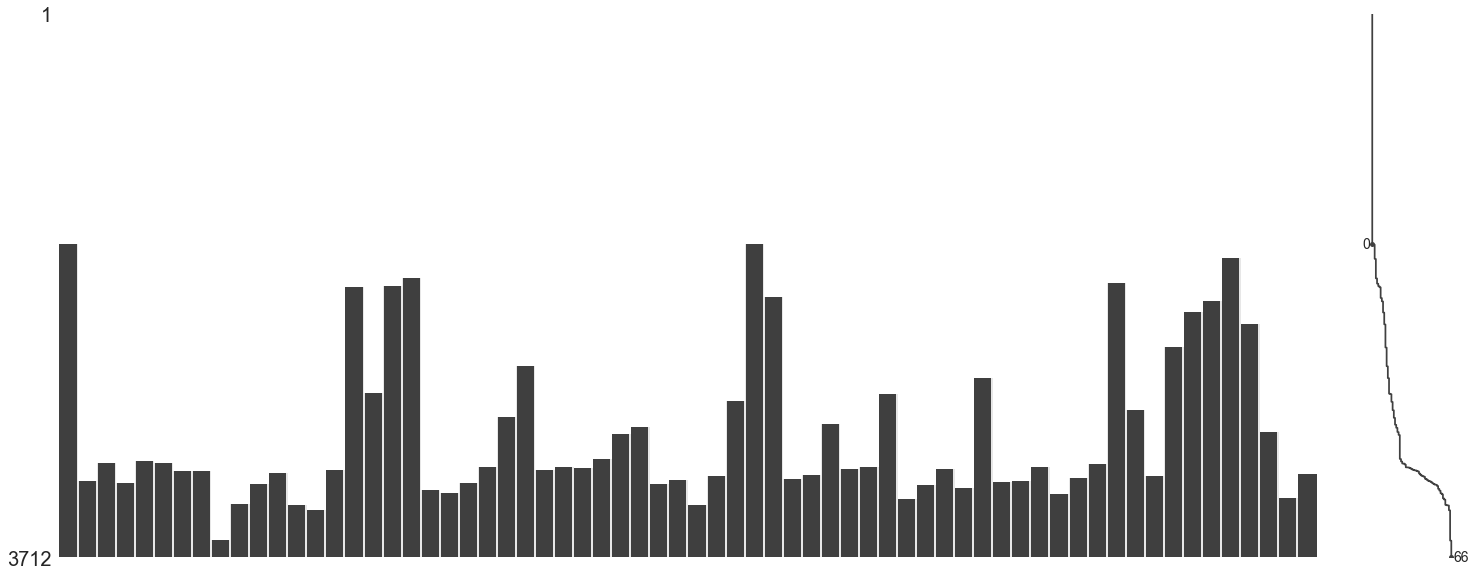

<Figure size 576x396 with 0 Axes>

In [54]:
msno.matrix(crypto_prices)
plt.show()
plt.clf()

Since the missing data are all in the heads of each price series, for the purposes of this corrleation analysis, I'll just ignore those.

Computing each token's returns:

In [55]:
crypto_returns = crypto_prices.pct_change()

crypto_returns.tail()

,btc,ada,ae,aion,ant,bat,bch,bnb,bsv,btcp,...,waves,wtc,xem,xlm,xmr,xrp,xvg,zec,zil,zrx
date,,,,,,,,,,,,,,,,,,,,,
2019-02-27,-0.005471,-0.014466,0.017354,0.095044,0.033994,0.103250,-0.011116,-0.030550,0.090018,0.141667,...,-0.011070,0.038462,0.011983,-0.002776,-0.009182,-0.024718,0.012064,-0.006964,0.022883,0.020977
2019-02-28,-0.002390,-0.001939,0.042534,-0.070211,0.014677,-0.027000,-0.010645,0.040966,-0.089298,-0.029197,...,0.000000,-0.018519,-0.010389,-0.010514,0.005238,-0.020527,-0.019758,0.000379,-0.022148,0.059125
2019-03-01,0.001429,-0.003076,0.020567,0.030424,-0.022517,0.032384,-0.006170,0.045409,-0.008405,-0.022556,...,-0.003731,0.037736,-0.022785,-0.005918,-0.015631,0.006231,-0.005497,-0.016105,-0.019275,-0.041938
2019-03-02,0.000405,0.002436,-0.008054,-0.000861,0.026702,0.005604,0.006360,0.098456,-0.005799,0.023077,...,0.011236,0.018182,0.006826,0.004128,0.009772,0.005856,0.021776,0.006355,0.006765,-0.006058
2019-03-03,0.001803,-0.008423,-0.020775,0.035329,-0.017907,0.091211,-0.002633,0.041301,0.000748,-0.022556,...,-0.007407,0.000000,-0.004124,-0.018111,0.007056,-0.006481,-0.003934,-0.008611,0.000695,-0.018151


And from the return data, computing the 90-day rolling correlation between the returns of BTC and each other token:

In [56]:
assets_to_plot = coin_list

crypto_correlations = pd.DataFrame(index=crypto_returns.index)

for asset in assets_to_plot:
    crypto_correlations.loc[:, asset] = crypto_returns["btc"].rolling(window=90).corr(crypto_returns[asset])

crypto_correlations.tail()


,ada,ae,aion,ant,bat,bch,bnb,bsv,btcp,btg,...,waves,wtc,xem,xlm,xmr,xrp,xvg,zec,zil,zrx
date,,,,,,,,,,,,,,,,,,,,,
2019-02-27,0.906817,0.681384,0.799874,0.670746,0.718443,0.782896,0.712882,0.562468,0.411150,0.837610,...,0.485532,0.843730,0.782210,0.918596,0.923845,0.876703,0.845014,0.890944,0.790162,0.891870
2019-02-28,0.907330,0.680741,0.811044,0.680837,0.721415,0.785264,0.711368,0.557438,0.461869,0.841320,...,0.485346,0.846233,0.784618,0.919288,0.927847,0.879199,0.845031,0.910492,0.806833,0.882514
2019-03-01,0.905744,0.673936,0.806989,0.671166,0.728842,0.789691,0.705389,0.561355,0.432227,0.850445,...,0.494985,0.838316,0.781880,0.925320,0.928718,0.879130,0.840799,0.906945,0.799919,0.874371
2019-03-02,0.904527,0.674100,0.804892,0.667075,0.725355,0.797942,0.696413,0.571795,0.426862,0.854441,...,0.483849,0.835151,0.779457,0.924510,0.930836,0.880148,0.838242,0.915673,0.801279,0.871936
2019-03-03,0.905925,0.672842,0.803800,0.667030,0.719935,0.798598,0.695327,0.581988,0.426402,0.854150,...,0.494259,0.834958,0.781057,0.923886,0.931321,0.879988,0.838902,0.915687,0.801069,0.871093


We can plot all of these rolling correlations on a single graph, but it's not going to look great since we're plotting 65 lines on the same figure:

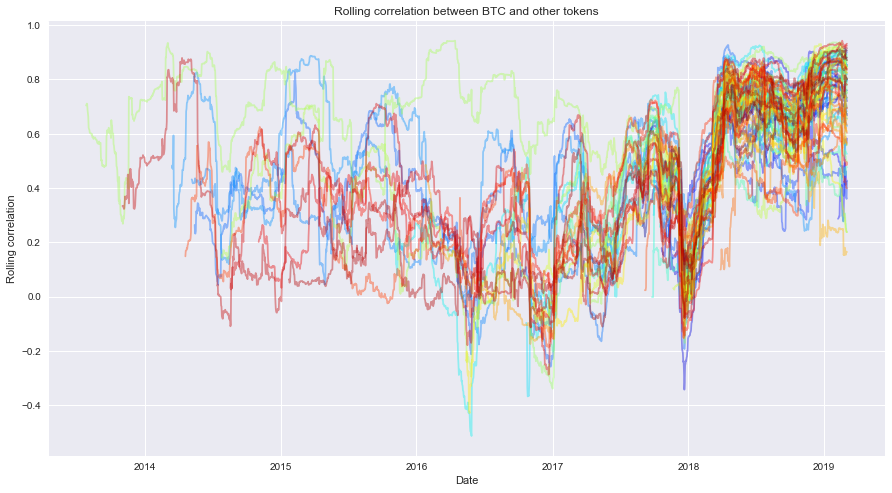

<Figure size 576x396 with 0 Axes>

In [57]:
crypto_correlations.plot(figsize=(15, 8), cmap="jet", alpha=0.4)
plt.title("Rolling correlation between BTC and other tokens")
plt.xlabel("Date")
plt.ylabel("Rolling correlation")
plt.legend([])
plt.show()
plt.clf()

Even though the above graph is very chaotic and polluted, we can still clearly discern a massize increase in correlations between BTC and every other token in the end of 2017 and beginning of 2018 as the great bull run that spanned from 2015 until the end of 2017 ended and we entered the subsequent bear cycle. Interestingly we see here that the crypto markets are behaving exactly like [traditional markets in times of crises](https://www.google.com/search?ei=ObGKXMnNC7qy5OUPi4SJyAI&q=correlations+in+financial+crisis&oq=correlations+in+crises), when correlations between assets tend to increase substantially.

In order to make a bit more sense of the data plotted above, we can take the mean rolling correlation between each asset and BTC and plot that instead:

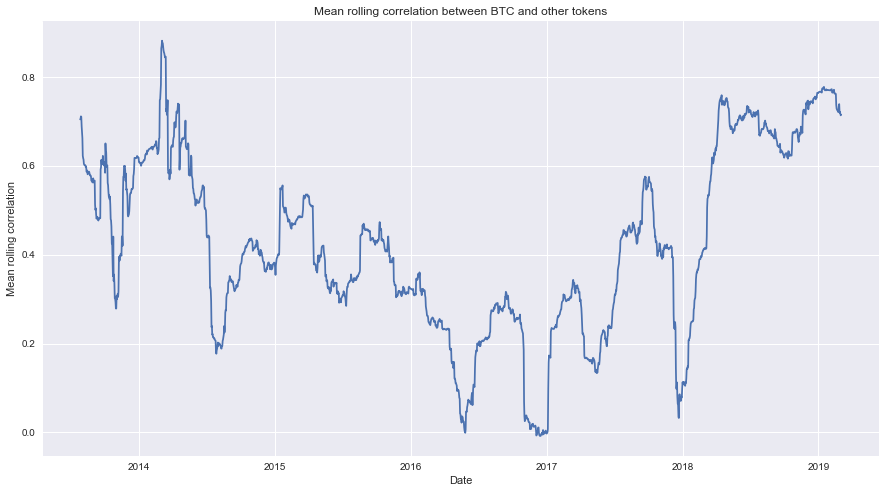

<Figure size 576x396 with 0 Axes>

In [58]:
mean_crypto_correlations = crypto_correlations.mean(axis=1)

mean_crypto_correlations.plot(figsize=(15, 8))
plt.title("Mean rolling correlation between BTC and other tokens")
plt.xlabel("Date")
plt.ylabel("Mean rolling correlation")
plt.show()
plt.clf()

The increase in correlations ocurring at the end of 2017 is now clearer.

## Final considerations

1. For this analysis I've used data on BTC prices beginning in mid 2013, but BTC has been trading in various venues since at least mid 2010. Alhtough price data may be less reliable for these earlier dates, it would still be interesting to include these in the analysis.
2. As I explained above, I didn’t use the entire `worst_drawdowns` DataFrame to select the peak and trough points when defining the `draw_ups` DataFrame. I only used the top 10 peak to trough movements in order not to cause longer-term bull movements to be broken-up by relatively small drawdowns on their way up. This choice of 10 is arbitrary and, instead, could have been selected based on other criteria. Maybe I could have taken into account a minimum drawdown % and drawdown length to select the trough to peak movements used in `draw_ups`.
3. The analysis of correlations between BTC and other tokens could also be expanded and made better in various ways (it wasn't my main objective in this analysis). What are the most highly correlated tokens? What are the least correlated tokens? What drives this correlation? Other asset classes (such as equities and bonds) could also be included in the analysis.